### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[1.00168889, 0.84322867, 0.89764919, ..., 1.01640703, 1.20373747,
        0.97037204],
       [1.028913  , 0.90536114, 0.924947  , ..., 1.04301131, 1.00578572,
        0.82234308],
       [0.92013836, 0.89966565, 0.9061088 , ..., 0.95344094, 1.04113555,
        1.19014847],
       ...,
       [0.90638344, 0.92727774, 1.06040697, ..., 0.98925006, 0.7699789 ,
        1.13980837],
       [1.05623333, 0.90113527, 1.17673089, ..., 0.88190302, 0.75553421,
        1.01923352],
       [1.0517061 , 1.02548497, 1.06281586, ..., 1.01414038, 1.03138342,
        1.01631576]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[ 75000, 400000,  75000, ..., 100000, 400000,  75000],
       [ 75000, 300000, 200000, ..., 200000, 200000, 500000],
       [ 75000,  75000,  75000, ..., 200000, 100000, 300000],
       ...,
       [ 75000, 100000, 200000, ...,  75000, 200000, 200000],
       [ 75000,  75000,  75000, ..., 500000,  75000,  75000],
       [ 75000,  75000,  75000, ...,  75000, 100000, 500000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
commission_percentages[0:10]

array([[0.04, 0.02, 0.02, ..., 0.04, 0.04, 0.03],
       [0.04, 0.03, 0.03, ..., 0.04, 0.04, 0.02],
       [0.03, 0.02, 0.03, ..., 0.03, 0.04, 0.04],
       ...,
       [0.03, 0.03, 0.04, ..., 0.03, 0.02, 0.04],
       [0.04, 0.03, 0.04, ..., 0.02, 0.02, 0.04],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04]])

In [10]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [11]:
total_commissions.std()

96204.21537404737

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2982500.0
1,3003500.0
2,2950250.0
3,2902000.0
4,2762500.0


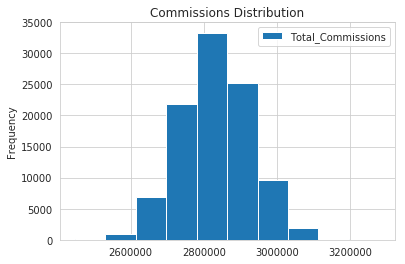

In [13]:
df.plot(kind='hist', title='Commissions Distribution')

In [14]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.832281e+06
std,9.620470e+04
min,2.447500e+06
25%,2.766750e+06
50%,2.831250e+06
75%,2.896500e+06
max,3.279750e+06
